# Table of Contents:

##### Introduction
##### Retrieving Data
##### Data Cleaning
##### Exploratory Data Analysis

## Step_1: Introduction

Data Analysis for "US Superstore" Dataset
#### 1. Data Overview
        Total Entries: 9994
        Total Features: 21
        Feature Types:
        Integer: 3
        Float: 3
        Object: 13
        DateTime: 2
#### 2. Key Features and Their Significance
##### Order Information:
Order ID, Order Date, Ship Date, Ship Mode
##### Customer Information:
Customer ID, Customer Name, Segment, Country, City, State, Postal Code, Region
##### Product Information:
Product ID, Product Name, Category, Sub-Category
##### Sales Metrics:
Sales, Quantity, Discount, Profit
#### 3. Analysis Objectives
##### Sales Analysis:
    Identify top-selling products and categories.
    Determine the sales trend over time.
    Analyze sales performance across different regions.
##### Customer Analysis:
    Segment customers based on purchase behavior.
    Identify key customer demographics.
##### Profit Analysis:
    Evaluate profit margins across products and categories.
    Analyze the impact of discounts on profit.
##### Shipping Analysis:
    Compare shipping modes and their costs.
    Analyze delivery times and their impact on customer satisfaction.
    ### 4. Potential Insights
    Which products are the most profitable?
    How does discounting affect overall sales and profit?
    What are the peak sales periods?
    How do different customer segments behave in terms of purchasing?

#### Install Required libraries

In [1]:
# !pip install pandas nympy seaborn xlrd

## Step_2: Import Libraries and Dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
df=pd.read_excel("US Superstore data.xls")
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df.shape

(9994, 21)

#### Data Overview
    Total Entries: 9994
    Total Features: 21
    Feature Types:
            Integer: 3
            Float: 3
            Object: 13
            DateTime: 2

## Step_3. Data Cleaning¶

3.1 Check duplicates or unnecessary data

In [6]:
if df.duplicated().sum()>0:
    print(f"there are duplicated rows {df.duplicated().sum()}")
else:
    print(f"there is no duplicated rows {df.duplicated().sum()}")

there is no duplicated rows 0


3.2 Check for missing values and handle them

In [7]:
df.isnull().sum()

#if there is null Filling empty column with 0
#df["Postal Code"]=df.fillna(0,inplace=True)

#Change data types like floating to integer
#df["Postal Code"]=df["Postal Code"].astype(int)

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [8]:
# Descriptive analysis of numerical data
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


## Step_4: Exploratory Data Analysis

#### Customer Analysis

##### Customer Segmentation

In [9]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [10]:
#type of Customers

type_of_customers=df["Segment"].unique()
type_of_customers

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [11]:
#number of customers in each segment
num_of_customers=df["Segment"].value_counts().reset_index()
num_of_customers=num_of_customers.rename(columns={"Segment":"Customers Type","count":"Total Customer"})

In [12]:
num_of_customers

,Customers Type,Total Customer
0,Consumer,5191
1,Corporate,3020
2,Home Office,1783


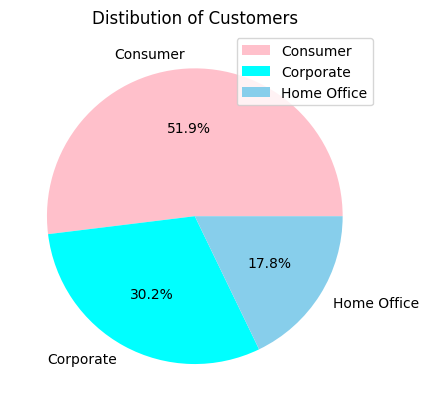

In [13]:
plt.pie(
    num_of_customers["Total Customer"],
    labels=num_of_customers["Customers Type"],
    colors=['Pink', 'cyan', 'skyblue'],
    
    autopct='%1.1f%%'
)
plt.title("Distibution of Customers")
plt.legend()
plt.show()

#### Customres and Sales

In [14]:
Sales_per_customers=df.groupby("Segment")["Sales"].sum().reset_index()
Sales_per_customers=Sales_per_customers.rename(columns={"Segment":"Customers Type","Sales":"Total Sales"})

Sales_per_customers

,Customers Type,Total Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


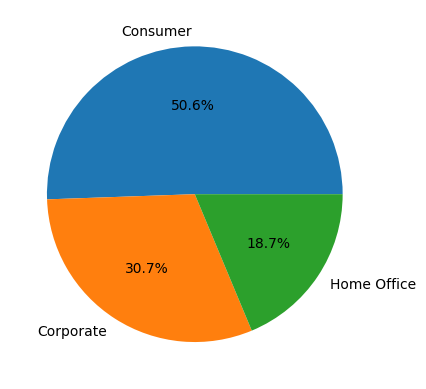

In [15]:
plt.pie( Sales_per_customers["Total Sales"],labels= Sales_per_customers["Customers Type"],autopct="%1.1f%%")
plt.show("Sales Per Customers Category")
plt.show()

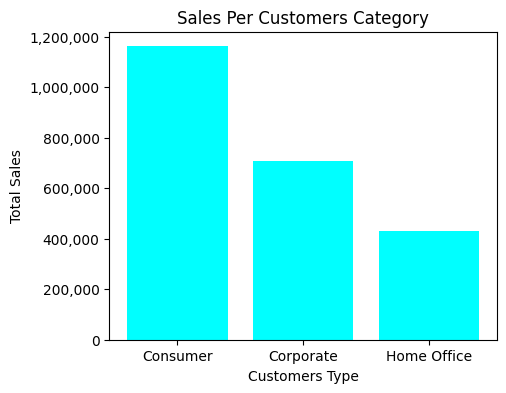

In [16]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(5, 4))

plt.bar(Sales_per_customers["Customers Type"],Sales_per_customers["Total Sales"],color ='cyan')

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Set title and labels
plt.title('Sales Per Customers Category')
plt.xlabel('Customers Type')
plt.ylabel('Total Sales')
plt.show()

#### Customer Loyality

In [17]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [18]:
Customer_order_freq=df.groupby(["Customer ID","Customer Name","Segment"])["Order ID"].count().reset_index()

#Rename the Order ID column
Customer_order_freq=Customer_order_freq.rename(columns={"Order ID":"Total Order"})

# Identify repeat customer

repeat_customers=Customer_order_freq[Customer_order_freq["Total Order"]>=1]
Sorted_repeat_customers=repeat_customers.sort_values(by="Total Order",ascending=False)
Sorted_repeat_customers.head(10).reset_index(drop=True)

,Customer ID,Customer Name,Segment,Total Order
0,WB-21850,William Brown,Consumer,37
1,MA-17560,Matt Abelman,Home Office,34
2,JL-15835,John Lee,Consumer,34
3,PP-18955,Paul Prost,Home Office,34
4,EH-13765,Edward Hooks,Corporate,32
5,JD-15895,Jonathan Doherty,Corporate,32
6,SV-20365,Seth Vernon,Consumer,32
7,CK-12205,Chloris Kastensmidt,Consumer,32
8,AP-10915,Arthur Prichep,Consumer,31
9,EP-13915,Emily Phan,Consumer,31


In [19]:
Customer_sales=df.groupby(["Customer ID","Customer Name","Segment"])["Sales"].sum().reset_index()
#Rename the Sale column
Customer_sales=Customer_sales.rename(columns={"Sales":"Total Sales"})

# Identify repeat customer

Top_spenders=Customer_sales.sort_values(by="Total Sales",ascending=False)
Top_spenders.head(10).reset_index(drop=True)

,Customer ID,Customer Name,Segment,Total Sales
0,SM-20320,Sean Miller,Home Office,25043.050
1,TC-20980,Tamara Chand,Corporate,19052.218
2,RB-19360,Raymond Buch,Consumer,15117.339
3,TA-21385,Tom Ashbrook,Home Office,14595.620
4,AB-10105,Adrian Barton,Consumer,14473.571
5,KL-16645,Ken Lonsdale,Consumer,14175.229
6,SC-20095,Sanjit Chand,Consumer,14142.334
7,HL-15040,Hunter Lopez,Consumer,12873.298
8,SE-20110,Sanjit Engle,Consumer,12209.438
9,CC-12370,Christopher Conant,Consumer,12129.072


#### Mode of Shipping

In [20]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [21]:
type_of_shipping=df["Ship Mode"].unique()
type_of_shipping

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [22]:
# Frquency of shipping mode
shipping_modes=df["Ship Mode"].value_counts().reset_index()
shipping_modes=shipping_modes.rename(columns={"Ship mode":"Mode of Shipping","count":"Use Frequency"})
shipping_modes

,Ship Mode,Use Frequency
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


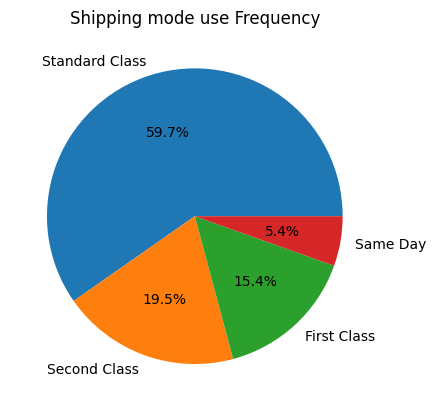

In [23]:
plt.pie(shipping_modes["Use Frequency"],labels=shipping_modes["Ship Mode"],autopct="%1.1f%%")
plt.title("Shipping mode use Frequency")
plt.show()

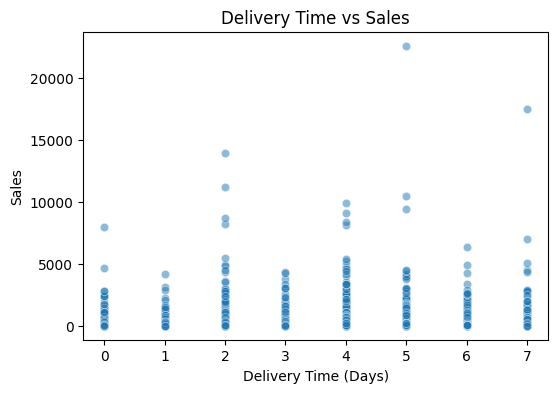

In [78]:
# Calculate delivery time in days
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days

# Scatter plot of Delivery Time vs Sales
plt.figure(figsize=(6,4))
sns.scatterplot(x='Delivery Time', y='Sales', data=df, alpha=0.5)
plt.title('Delivery Time vs Sales')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Sales')
plt.show()

In [79]:
# Correlation between Delivery Time and Sales
correlation = df[['Delivery Time', 'Sales']].corr().iloc[0, 1]
print(f'Correlation between Delivery Time and Sales: {correlation:.2f}')

Correlation between Delivery Time and Sales: -0.01


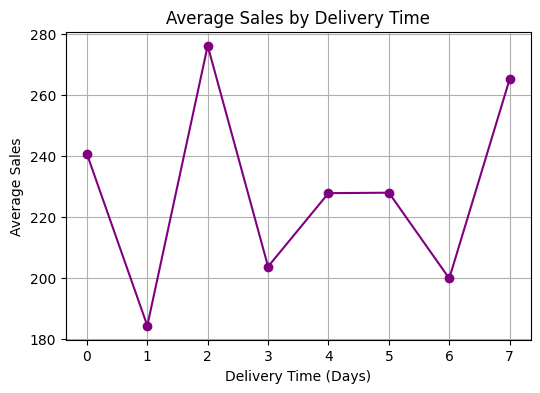

In [80]:
# Analysis of Delivery Time and Sales
delivery_time_sales = df.groupby('Delivery Time')['Sales'].mean()

# Plotting Delivery Time vs Average Sales
fig, ax = plt.subplots(figsize=(6,4))
delivery_time_sales.plot(kind='line', ax=ax, marker='o', color='purple')
ax.set_title('Average Sales by Delivery Time')
ax.set_xlabel('Delivery Time (Days)')
ax.set_ylabel('Average Sales')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.grid(True)
plt.show()

#### Geographical Analysis

In [24]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136


In [25]:
# Customers by State

state=df["State"].value_counts().reset_index()
state=state.rename(columns={"count":"number of customers"})
state.head(10)

,State,number of customers
0,California,2001
1,New York,1128
2,Texas,985
3,Pennsylvania,587
4,Washington,506
5,Illinois,492
6,Ohio,469
7,Florida,383
8,Michigan,255
9,North Carolina,249


In [26]:
# Customers by City

state=df["City"].value_counts().reset_index()
state=state.rename(columns={"count":"number of customers"})
state.head(10)

,City,number of customers
0,New York City,915
1,Los Angeles,747
2,Philadelphia,537
3,San Francisco,510
4,Seattle,428
5,Houston,377
6,Chicago,314
7,Columbus,222
8,San Diego,170
9,Springfield,163


In [27]:
#Sales per State
state_sales=df.groupby(df["State"])["Sales"].sum().reset_index()

#sorting sale by decending
state_sales=state_sales.sort_values(by='Sales',ascending=False)
state_sales.head(10).reset_index(drop=True)

,State,Sales
0,California,457687.6315
1,New York,310876.2710
2,Texas,170188.0458
3,Washington,138641.2700
4,Pennsylvania,116511.9140
5,Florida,89473.7080
6,Illinois,80166.1010
7,Ohio,78258.1360
8,Michigan,76269.6140
9,Virginia,70636.7200


In [28]:
# Sales per city
state_sales=df.groupby(df["City"])["Sales"].sum().reset_index()


state_sales=state_sales.sort_values(by='Sales',ascending=False)
state_sales.head(10).reset_index(drop=True)

,City,Sales
0,New York City,256368.1610
1,Los Angeles,175851.3410
2,Seattle,119540.7420
3,San Francisco,112669.0920
4,Philadelphia,109077.0130
5,Houston,64504.7604
6,Chicago,48539.5410
7,San Diego,47521.0290
8,Jacksonville,44713.1830
9,Springfield,43054.3420


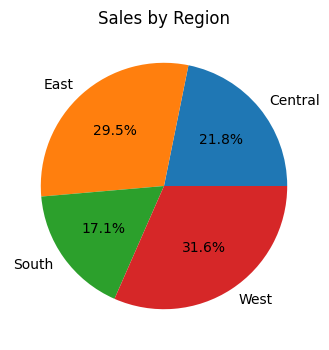

In [29]:
# Sales by region
sales_by_region = df.groupby('Region')['Sales'].sum()
sales_by_region.plot(kind='pie', autopct='%1.1f%%', figsize=(4, 4))
plt.title('Sales by Region')
plt.ylabel('')
plt.show()

#### Product Analysis

In [30]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [31]:
product_category=df["Category"].unique()
product_category

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [32]:
product_Subcategory=df["Sub-Category"].unique()
product_Subcategory

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [33]:
# Count the number of unique sub-categories in each category
sub_category_count = df.groupby("Category")["Sub-Category"].nunique().reset_index()

# Rename the column to reflect that it is a count of unique sub-categories
sub_category_count.columns = ['Category', 'Unique Sub-Category Count']

# Sort the DataFrame by the count of unique sub-categories in descending order
sub_category_count = sub_category_count.sort_values(by="Unique Sub-Category Count", ascending=False)

# Display the result
print(sub_category_count.reset_index(drop=True))


          Category  Unique Sub-Category Count
0  Office Supplies                          9
1        Furniture                          4
2       Technology                          4


In [34]:
#Sales by product Category
Category_sales=df.groupby(df["Category"])["Sales"].sum().reset_index()
Category_sales=Category_sales.sort_values(by="Sales",ascending=False)

Category_sales

,Category,Sales
2,Technology,836154.0330
0,Furniture,741999.7953
1,Office Supplies,719047.0320


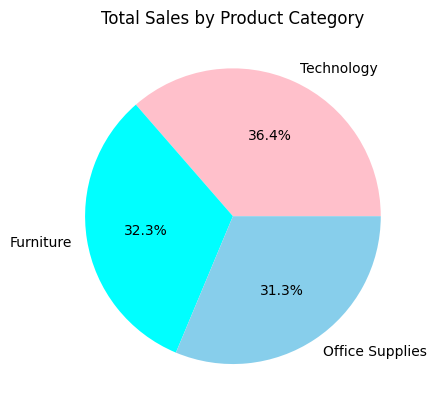

In [35]:
plt.pie(
    Category_sales["Sales"],
    labels=Category_sales["Category"],
    colors=['Pink', 'cyan', 'skyblue'],
    
    autopct='%1.1f%%'
)
plt.title("Total Sales by Product Category")
#plt.legend()
plt.show()

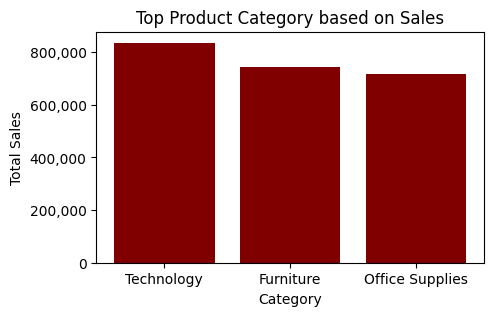

In [36]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(5, 3))
#Category_sales.plot(kind='bar', ax=ax)
plt.bar(Category_sales["Category"],Category_sales["Sales"],color ='maroon')
# Set title and labels
ax.set_title('Top Product Category based on Sales')
ax.set_xlabel('Category')
ax.set_ylabel('Total Sales')

# Format y-axis to display values in plain format
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Display the plot
plt.show()

In [37]:
#Sales by product Sub-Category
product_sub_category_sales=df.groupby(df["Sub-Category"])["Sales"].sum().reset_index()
product_sub_category_sales=product_sub_category_sales.sort_values(by="Sales",ascending=False)

Top_product_sub_category_sales=product_sub_category_sales.head(10).reset_index(drop=True)
Top_product_sub_category_sales

,Sub-Category,Sales
0,Phones,330007.0540
1,Chairs,328449.1030
2,Storage,223843.6080
3,Tables,206965.5320
4,Binders,203412.7330
5,Machines,189238.6310
6,Accessories,167380.3180
7,Copiers,149528.0300
8,Bookcases,114879.9963
9,Appliances,107532.1610


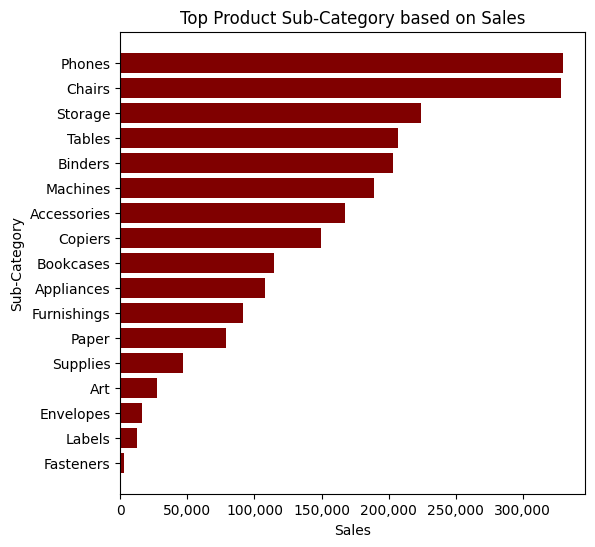

In [38]:
Top_product_sub_category_sales=product_sub_category_sales.sort_values(by="Sales",ascending=True)
# Create a bar chart
fig, ax = plt.subplots(figsize=(6, 6))
#Category_sales.plot(kind='bar', ax=ax)
plt.barh(Top_product_sub_category_sales["Sub-Category"],Top_product_sub_category_sales["Sales"],color ='maroon')
# Set title and labels
ax.set_title('Top Product Sub-Category based on Sales')
ax.set_xlabel('Sales')
ax.set_ylabel('Sub-Category')

# Format y-axis to display values in plain format
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

# Display the plot
plt.show()

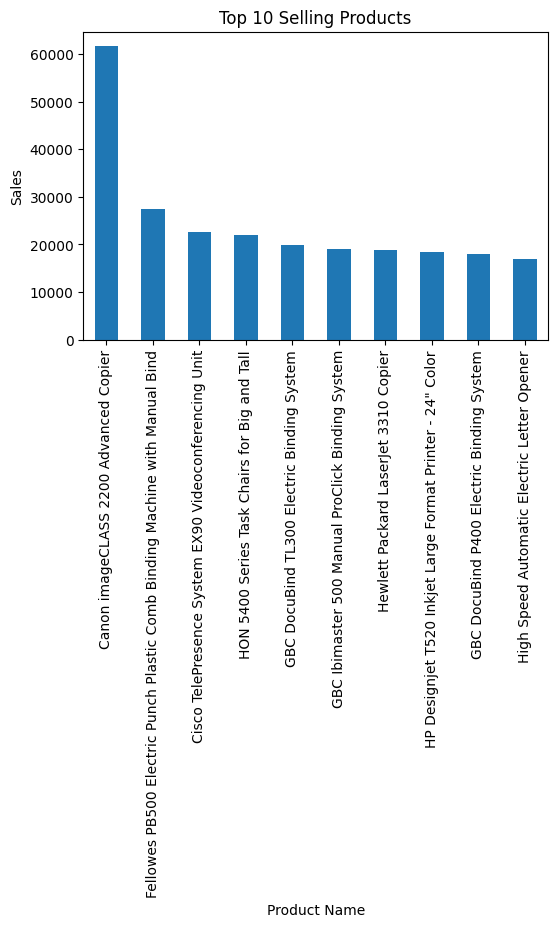

In [39]:
# Top-selling products
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(6, 4))
plt.title('Top 10 Selling Products')
plt.ylabel('Sales')
plt.xlabel('Product Name')
plt.show()

### Sales Analysis

In [40]:
# Sales trend over Year
df['Order Date'] = pd.to_datetime(df['Order Date'])
year_sales_trend = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
year_sales_trend=year_sales_trend.rename(columns={"Order Date":"year","Sales":"Total Sales"})
year_sales_trend        

,year,Total Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


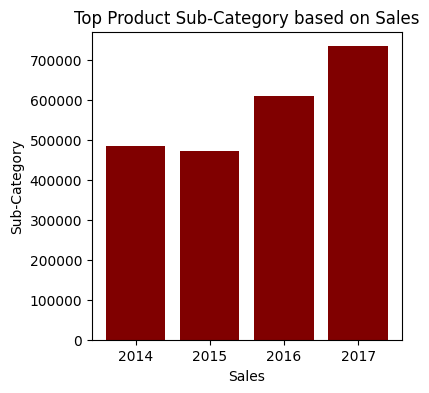

In [41]:
fig, ax = plt.subplots(figsize=(4, 4))
#Category_sales.plot(kind='bar', ax=ax)
plt.bar(year_sales_trend ["year"],year_sales_trend ["Total Sales"],color ='maroon')
# Set title and labels
ax.set_title('Top Product Sub-Category based on Sales')
ax.set_xlabel('Sales')
ax.set_ylabel('Sub-Category')

# Format y-axis to display values in plain format
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))

# Display the plot
plt.show()

In [42]:
# Sales trend over Quater
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=True)
year_sales= df[df['Order Date'].dt.year==2017]

quaterly_sales=year_sales.resample("Q",on="Order Date")["Sales"].sum()
quaterly_sales=quaterly_sales.reset_index()
quaterly_sales=quaterly_sales.rename(columns={"Order Date":"Quater","Sales":"Total Sales"})
quaterly_sales

C:\Users\Invisible Boy\AppData\Local\Temp\ipykernel_14252\1556373047.py:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quaterly_sales=year_sales.resample("Q",on="Order Date")["Sales"].sum()


,Quater,Total Sales
0,2017-03-31,123144.8602
1,2017-06-30,133764.3720
2,2017-09-30,196251.9560
3,2017-12-31,280054.0670


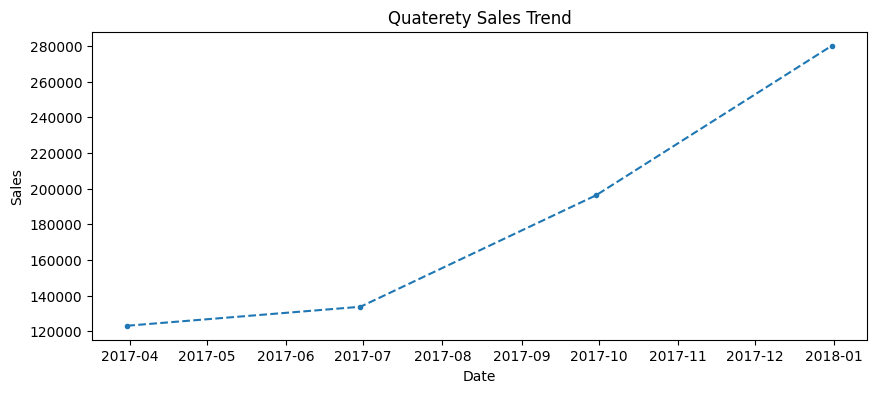

In [43]:
# Sales trend over time
fig, ax = plt.subplots(figsize=(10, 4))
plt.plot(quaterly_sales["Quater"],quaterly_sales["Total Sales"],marker=".",linestyle="--")
plt.title('Quaterety Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.show()

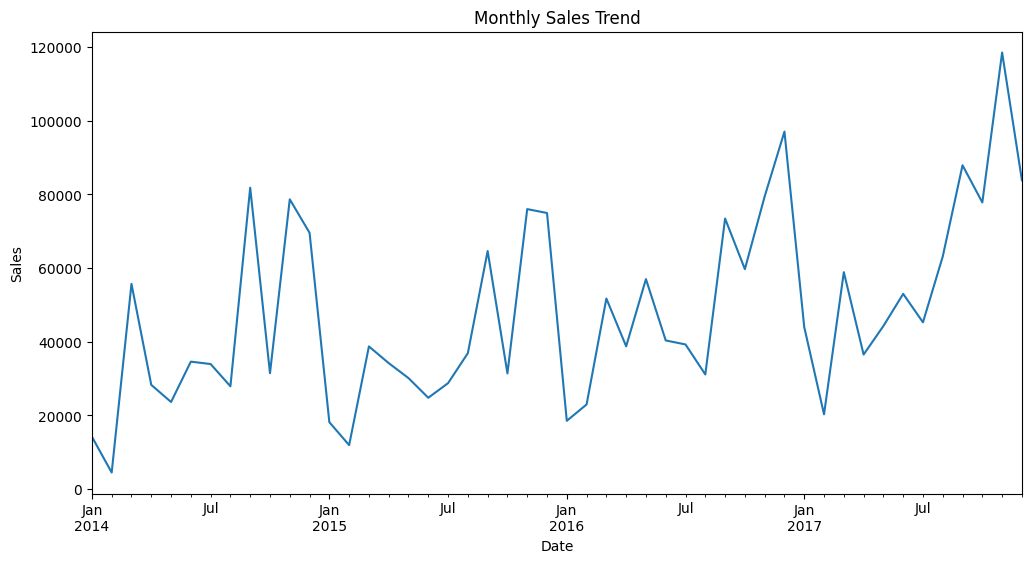

In [44]:
# Sales trend over time
df['Order Date'] = pd.to_datetime(df['Order Date'])
sales_trend = df.groupby(df['Order Date'].dt.to_period('M'))['Sales'].sum()
sales_trend.plot(kind='line', figsize=(12, 6))
plt.title('Monthly Sales Trend')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.show()

### Profit Analysis

In [50]:
# Calculate profit margin for each product and category
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Average profit margin by product
product_profit_margin = df.groupby('Category')['Profit Margin'].mean()
product_profit_margin = product_profit_margin.sort_values(ascending=False)
product_profit_margin.head()

Category
Technology         15.613805
Office Supplies    13.803029
Furniture           3.878353
Name: Profit Margin, dtype: float64

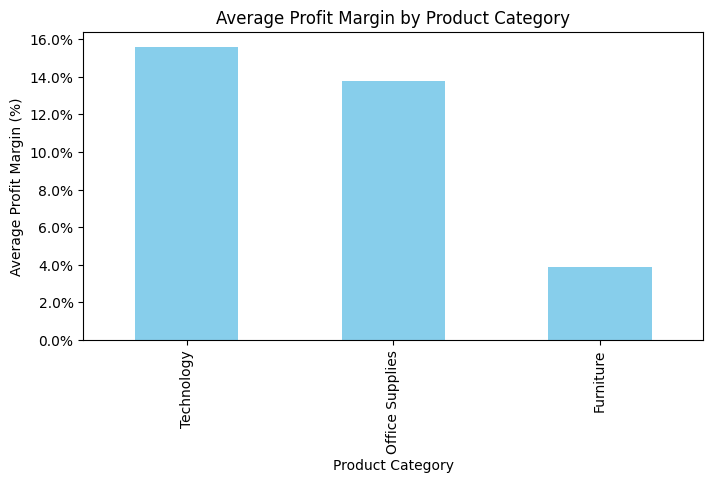

In [61]:
# Plotting profit margins by product
fig, ax = plt.subplots(figsize=(8,4))
product_profit_margin.plot(kind='bar', ax=ax, color='skyblue')
ax.set_title('Average Profit Margin by Product Category')
ax.set_xlabel('Product Category')
ax.set_ylabel('Average Profit Margin (%)')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}%'.format(x)))
plt.xticks(rotation=90)
plt.show()

In [56]:
Subcategory_profit_margin = df.groupby('Sub-Category')['Profit Margin'].mean()

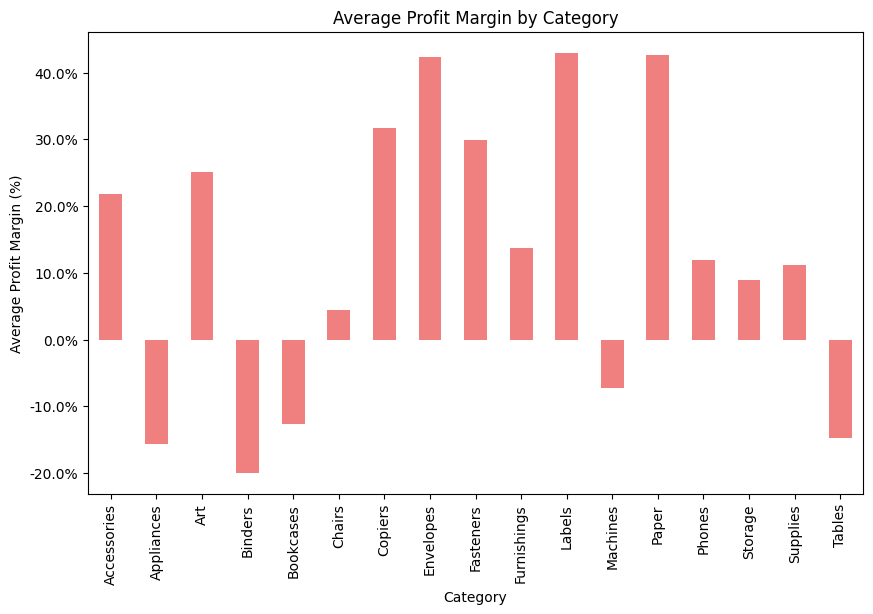

In [57]:
# Plotting profit margins by category
fig, ax = plt.subplots(figsize=(10, 6))
Subcategory_profit_margin.plot(kind='bar', ax=ax, color='lightcoral')
ax.set_title('Average Profit Margin by Sub-Category')
ax.set_xlabel('Sub-Category')
ax.set_ylabel('Average Profit Margin (%)')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}%'.format(x)))
plt.show()

#### 2. Analyze the Impact of Discounts on Profit
##### Discount Analysis:
Analyze how discounts affect profit by examining the relationship between discount percentage and profit. We can use scatter plots and correlation coefficients to understand this relationship.

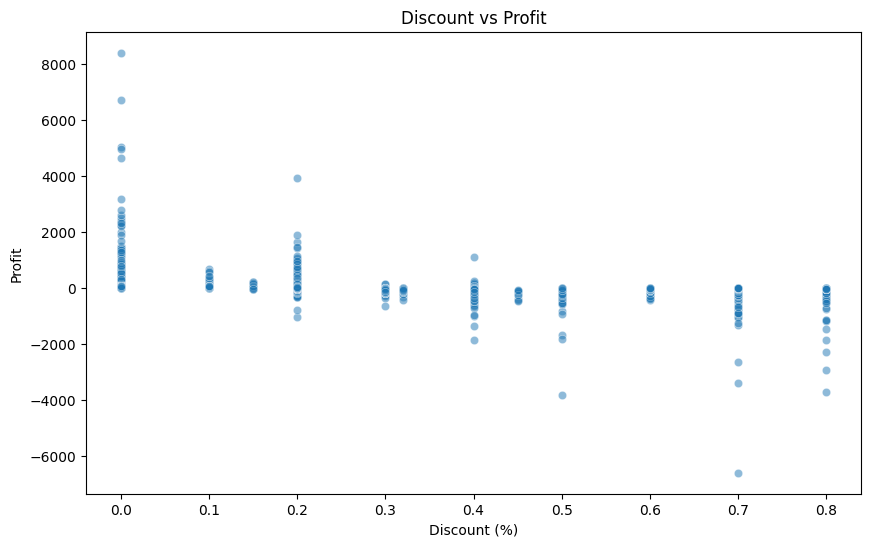

In [63]:
import seaborn as sns

# Scatter plot of Discount vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Discount', y='Profit', data=df, alpha=0.5)
plt.title('Discount vs Profit')
plt.xlabel('Discount (%)')
plt.ylabel('Profit')
plt.show()

In [64]:
# Correlation between Discount and Profit
correlation = df[['Discount', 'Profit']].corr().iloc[0, 1]
print(f'Correlation between Discount and Profit: {correlation:.2f}')

Correlation between Discount and Profit: -0.22


In [67]:
# Analyzing the impact of discount on profit margins
df['Discount Impact'] = df['Profit Margin'] - (df['Discount'] * 100)
discount_impact = df.groupby('Discount')['Discount Impact'].mean()
discount_impact

Discount
0.00     34.016048
0.10      5.579196
0.15    -11.583710
0.20     -2.316106
0.30    -41.548143
0.32    -49.429194
0.40    -62.249191
0.45    -90.454545
0.50   -104.909091
0.60   -128.913043
0.70   -149.473684
0.80   -262.500000
Name: Discount Impact, dtype: float64

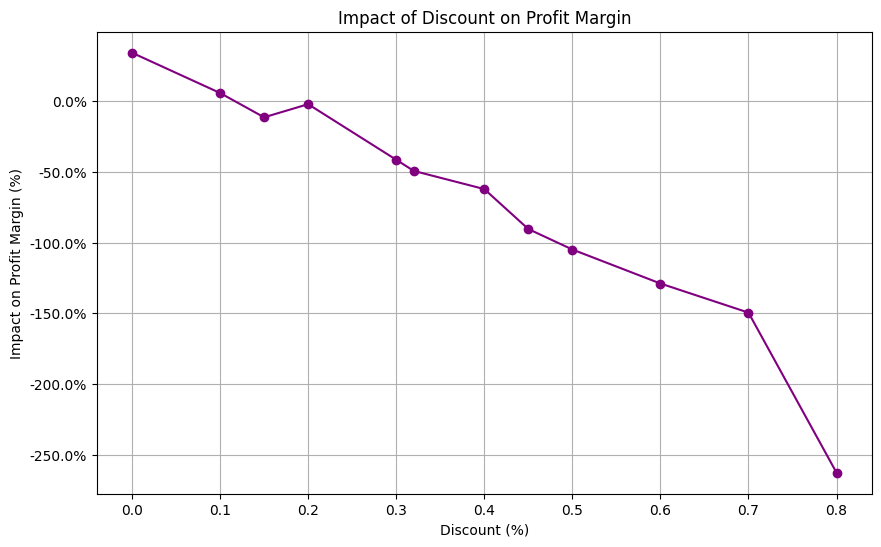

In [68]:
# Plotting Discount Impact
fig, ax = plt.subplots(figsize=(10, 6))
discount_impact.plot(kind='line', ax=ax, marker='o', color='purple')
ax.set_title('Impact of Discount on Profit Margin')
ax.set_xlabel('Discount (%)')
ax.set_ylabel('Impact on Profit Margin (%)')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.1f}%'.format(x)))
plt.grid(True)
plt.show()

##### 3. Additional Analysis
##### Profit Distribution:
Analyze the distribution of profit values to understand the range and central tendency.

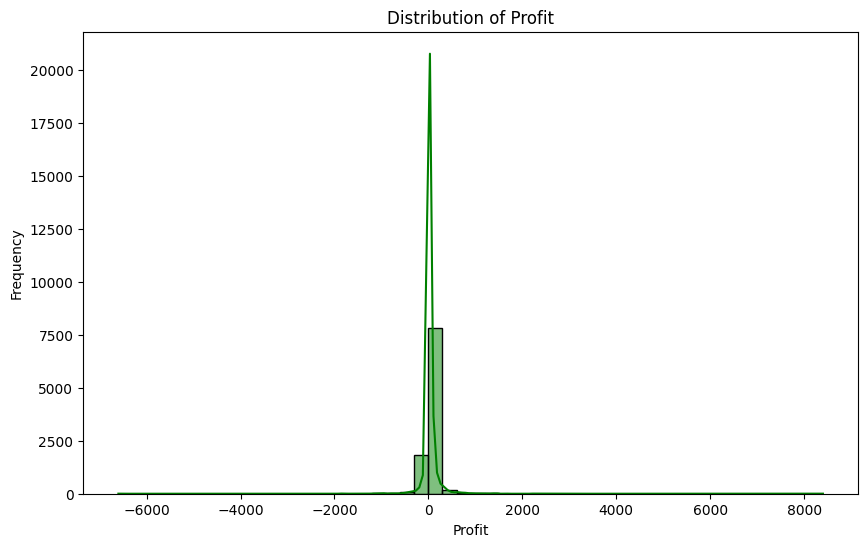

In [69]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Profit'], bins=50, kde=True, color='green')
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

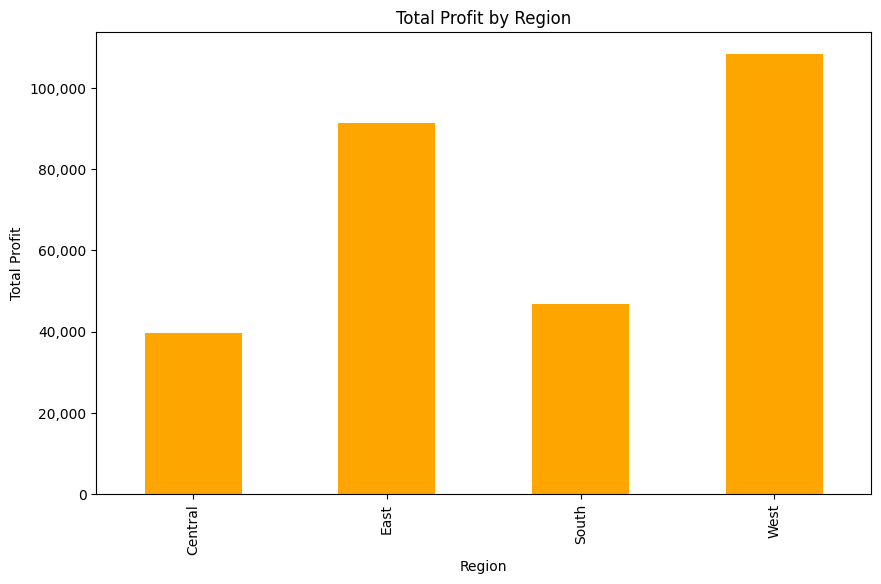

In [70]:
# Total profit by region
region_profit = df.groupby('Region')['Profit'].sum()

# Plotting total profit by region
fig, ax = plt.subplots(figsize=(10, 6))
region_profit.plot(kind='bar', ax=ax, color='orange')
ax.set_title('Total Profit by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Total Profit')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.show()
